# Test unitaire - Activité 4

---
Nom : Coquet

Prénom : Baptiste

Groupe de TP : RT1C2

---

> ☝ **Objectif :** Produire des représentations graphiques des résultats issus du traitement. Intégration de ces représentations dans la page Web.


Dans cette activité, nous allons mettre en valeur les données en utilisant d'une part `matplotlib` une bibliothèque complète permettant de créer des représentations graphiques en Python, et d'autre part `GeoPandas` une bibliothèque dérivée de `Pandas` pour l'analyse de données spatialisées en vue de la création de cartes à l'aide de la bilbliothèque `contextily`.

## Préambule 

Avant toute chose, il faut importer les bibliothèques et modules utiles :

> ⛔ ne pas modifier le code donné ci-dessous.

In [1]:
# importations et configuration
#

# installation des bibliothèques geopandas et contextily dans l'environnement Colab
!pip install geopandas
!pip install contextily

import sys                      # pour l'accès au commandes système
from google.colab import drive  # pour l'accès au drive
import json                     # pour manipuler le format JSON
import pandas as pd             # pour extraire, calculer, publier
import geopandas as gpd         # pour la spatialisation des données
import matplotlib.pyplot as plt # pour les graphes
import contextily as ctx        # pour l'utilisation de cartes géographiques

# montage du drive sur Colab (avec autorisation d'accès)
drive.mount('/content/drive', force_remount=True)
# cliquez sur le lien affiché dans la console afin d'obtenir votre clé d'accès
# et recopiez cette clé dans la zone de saisie de texte.

# pour inclure les fonctions "faites maison" et spécifiques
sys.path.insert(0,'/content/drive/My Drive/Colab notebooks/SAE15/tools')
import sae15_tools as tools 
import sae15_spec as spec 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 40.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.2 MB/s eta 0:00:00
Mounted at /content/drive


## Préparation des données

Il s'agit ici de réaliser les opérations suivantes :
1. lire les données statiques et dynamiques depuis l'API de Vélib' Métropole,
1. transformer les données 'stations' statiques et dynamiques en deux Data Frames (Pandas),
1. fusionner les deux Data Frames en un seul (jointure).

In [2]:
# chargement des données statiques et dynamiques depuis l'API Vélib' Métropole 
datastat = tools.loadVelibInformation()
datastat = tools.getVelibStations(datastat)

datadynamic = tools.loadVelibStatus()
datadynamic = tools.getVelibStations(datadynamic)
# conversion en Data Frame Pandas
datastat_pandas = pd.DataFrame(datastat)
datadynamic_pandas = pd.DataFrame(datadynamic)

display(datastat_pandas)
display(datadynamic_pandas)
# fusion des deux Data Frames selon l'id des stations (fonction merge)
merged_data = pd.merge(datadynamic_pandas,datastat_pandas) # cette variable doit contenir la fusion des deux Data Frames

# affichage du résultat
display(merged_data)


station_id                                   name        lat       lon  \
0      213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1      653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2      516709288    Charonne - Robert et Sonia Delauney  48.855908  2.392571   
3          36255                     Toudouze - Clauzel  48.879296  2.337360   
4       37815204                        Mairie du 12ème  48.840855  2.387555   
...          ...                                    ...        ...       ...   
1444    54000604                 Ordener - Poissonniers  48.891214  2.351289   
1445    43247738                     Ruisseau - Ordener  48.892995  2.340145   
1446   102311820                 Clignancourt - Ordener  48.891458  2.348636   
1447   368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1448   315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode rental_methods  
0           35       16107            NaN  
1           30       31104   [CREDITCARD]  
2           20       11104            NaN  
3           21        9020   [CREDITCARD]  
4           30       12109            NaN  
...        ...         ...            ...  
1444        35       18023   [CREDITCARD]  
1445        35       18026   [CREDITCARD]  
1446        35       18024   [CREDITCARD]  
1447        25       42004   [CREDITCARD]  
1448        67        8004   [CREDITCARD]  

[1449 rows x 7 columns]

stationCode  station_id  num_bikes_available  numBikesAvailable  \
0          16107   213688169                    8                  8   
1          31104   653222953                   12                 12   
2          11104   516709288                    1                  1   
3           9020       36255                    4                  4   
4          12109    37815204                   11                 11   
...          ...         ...                  ...                ...   
1444       18023    54000604                    5                  5   
1445       18026    43247738                    4                  4   
1446       18024   102311820                    8                  8   
1447       42004   368766689                   15                 15   
1448        8004   315022587                   27                 27   

               num_bikes_available_types  num_docks_available  \
0      [{'mechanical': 3}, {'ebike': 5}]                   26   
1      [{'mechanical': 8}, {'ebike': 4}]                   13   
2      [{'mechanical': 0}, {'ebike': 1}]                   17   
3      [{'mechanical': 3}, {'ebike': 1}]                   17   
4      [{'mechanical': 6}, {'ebike': 5}]                   19   
...                                  ...                  ...   
1444   [{'mechanical': 0}, {'ebike': 5}]                   29   
1445   [{'mechanical': 0}, {'ebike': 4}]                   30   
1446   [{'mechanical': 3}, {'ebike': 5}]                   26   
1447  [{'mechanical': 13}, {'ebike': 2}]                   12   
1448  [{'mechanical': 21}, {'ebike': 6}]                   49   

      numDocksAvailable  is_installed  is_returning  is_renting  last_reported  
0                    26             1             1           1     1674579832  
1                    13             1             1           1     1674579778  
2                    17             1             1           1     1674579905  
3                    17             1             1           1     1674579901  
4                    19             1             1           1     1674579909  
...                 ...           ...           ...         ...            ...  
1444                 29             1             1           1     1674579668  
1445                 30             1             1           1     1674579837  
1446                 26             1             1           1     1674579818  
1447                 12             1             1           1     1674579824  
1448                 49             1             1           1     1674579923  

[1449 rows x 11 columns]

stationCode  station_id  num_bikes_available  numBikesAvailable  \
0          16107   213688169                    8                  8   
1          31104   653222953                   12                 12   
2          11104   516709288                    1                  1   
3           9020       36255                    4                  4   
4          12109    37815204                   11                 11   
...          ...         ...                  ...                ...   
1444       18023    54000604                    5                  5   
1445       18026    43247738                    4                  4   
1446       18024   102311820                    8                  8   
1447       42004   368766689                   15                 15   
1448        8004   315022587                   27                 27   

               num_bikes_available_types  num_docks_available  \
0      [{'mechanical': 3}, {'ebike': 5}]                   26   
1      [{'mechanical': 8}, {'ebike': 4}]                   13   
2      [{'mechanical': 0}, {'ebike': 1}]                   17   
3      [{'mechanical': 3}, {'ebike': 1}]                   17   
4      [{'mechanical': 6}, {'ebike': 5}]                   19   
...                                  ...                  ...   
1444   [{'mechanical': 0}, {'ebike': 5}]                   29   
1445   [{'mechanical': 0}, {'ebike': 4}]                   30   
1446   [{'mechanical': 3}, {'ebike': 5}]                   26   
1447  [{'mechanical': 13}, {'ebike': 2}]                   12   
1448  [{'mechanical': 21}, {'ebike': 6}]                   49   

      numDocksAvailable  is_installed  is_returning  is_renting  \
0                    26             1             1           1   
1                    13             1             1           1   
2                    17             1             1           1   
3                    17             1             1           1   
4                    19             1             1           1   
...                 ...           ...           ...         ...   
1444                 29             1             1           1   
1445                 30             1             1           1   
1446                 26             1             1           1   
1447                 12             1             1           1   
1448                 49             1             1           1   

      last_reported                                   name        lat  \
0        1674579832          Benjamin Godard - Victor Hugo  48.865983   
1        1674579778              Mairie de Rosny-sous-Bois  48.871257   
2        1674579905    Charonne - Robert et Sonia Delauney  48.855908   
3        1674579901                     Toudouze - Clauzel  48.879296   
4        1674579909                        Mairie du 12ème  48.840855   
...             ...                                    ...        ...   
1444     1674579668                 Ordener - Poissonniers  48.891214   
1445     1674579837                     Ruisseau - Ordener  48.892995   
1446     1674579818                 Clignancourt - Ordener  48.891458   
1447     1674579824  Westermeyer - Paul Vaillant-Couturier  48.819116   
1448     1674579923    Malesherbes - Place de la Madeleine  48.870406   

           lon  capacity rental_methods  
0     2.275725        35            NaN  
1     2.486581        30   [CREDITCARD]  
2     2.392571        20            NaN  
3     2.337360        21   [CREDITCARD]  
4     2.387555        30            NaN  
...        ...       ...            ...  
1444  2.351289        35   [CREDITCARD]  
1445  2.340145        35   [CREDITCARD]  
1446  2.348636        35   [CREDITCARD]  
1447  2.396664        25   [CREDITCARD]  
1448  2.323244        67   [CREDITCARD]  

[1449 rows x 16 columns]

## Spatialisation et cartographie des données

Un [GéoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) est un DataFrame qui contient une colonne qui a un statut spécial : c'est sa géometrie. Quand une fonction ou méthode spatiale est appliquée au GéoDataFrame, elle agira toujours sur la colonne définie comme étant la géométrie. On peut y accéder grâce à l’attribut `nom_du_geodataframe.geometry`. 

Le code ci-dessous permet de convertir le DataFrame des stations en GéoDataFrame :

In [3]:
# Convert the longitude and latitude to a format recognized by geoPandas
geom = gpd.points_from_xy(merged_data["lon"], merged_data["lat"])

# Create a DataFrame with a geometry containing the Points
geo_data = gpd.GeoDataFrame(merged_data, crs="EPSG:4326", geometry=geom)
display(geo_data)

stationCode  station_id  num_bikes_available  numBikesAvailable  \
0          16107   213688169                    8                  8   
1          31104   653222953                   12                 12   
2          11104   516709288                    1                  1   
3           9020       36255                    4                  4   
4          12109    37815204                   11                 11   
...          ...         ...                  ...                ...   
1444       18023    54000604                    5                  5   
1445       18026    43247738                    4                  4   
1446       18024   102311820                    8                  8   
1447       42004   368766689                   15                 15   
1448        8004   315022587                   27                 27   

               num_bikes_available_types  num_docks_available  \
0      [{'mechanical': 3}, {'ebike': 5}]                   26   
1      [{'mechanical': 8}, {'ebike': 4}]                   13   
2      [{'mechanical': 0}, {'ebike': 1}]                   17   
3      [{'mechanical': 3}, {'ebike': 1}]                   17   
4      [{'mechanical': 6}, {'ebike': 5}]                   19   
...                                  ...                  ...   
1444   [{'mechanical': 0}, {'ebike': 5}]                   29   
1445   [{'mechanical': 0}, {'ebike': 4}]                   30   
1446   [{'mechanical': 3}, {'ebike': 5}]                   26   
1447  [{'mechanical': 13}, {'ebike': 2}]                   12   
1448  [{'mechanical': 21}, {'ebike': 6}]                   49   

      numDocksAvailable  is_installed  is_returning  is_renting  \
0                    26             1             1           1   
1                    13             1             1           1   
2                    17             1             1           1   
3                    17             1             1           1   
4                    19             1             1           1   
...                 ...           ...           ...         ...   
1444                 29             1             1           1   
1445                 30             1             1           1   
1446                 26             1             1           1   
1447                 12             1             1           1   
1448                 49             1             1           1   

      last_reported                                   name        lat  \
0        1674579832          Benjamin Godard - Victor Hugo  48.865983   
1        1674579778              Mairie de Rosny-sous-Bois  48.871257   
2        1674579905    Charonne - Robert et Sonia Delauney  48.855908   
3        1674579901                     Toudouze - Clauzel  48.879296   
4        1674579909                        Mairie du 12ème  48.840855   
...             ...                                    ...        ...   
1444     1674579668                 Ordener - Poissonniers  48.891214   
1445     1674579837                     Ruisseau - Ordener  48.892995   
1446     1674579818                 Clignancourt - Ordener  48.891458   
1447     1674579824  Westermeyer - Paul Vaillant-Couturier  48.819116   
1448     1674579923    Malesherbes - Place de la Madeleine  48.870406   

           lon  capacity rental_methods                  geometry  
0     2.275725        35            NaN  POINT (2.27572 48.86598)  
1     2.486581        30   [CREDITCARD]  POINT (2.48658 48.87126)  
2     2.392571        20            NaN  POINT (2.39257 48.85591)  
3     2.337360        21   [CREDITCARD]  POINT (2.33736 48.87930)  
4     2.387555        30            NaN  POINT (2.38755 48.84086)  
...        ...       ...            ...                       ...  
1444  2.351289        35   [CREDITCARD]  POINT (2.35129 48.89121)  
1445  2.340145        35   [CREDITCARD]  POINT (2.34014 48.89299)  
1446  2.348636        35   [CREDITCARD]  POINT (2.34864 48.89146)

L'acronyme `crs` signifie Coordinate Reference System, c'est une indication du système de projection utilisé. En regardant la documentation Vélib, on voit que le référentiel de projection utilisé est `WGS84`. C'est le système de projection le plus commun aujourd'hui et il est notamment utilisé par les systèmes de positionnement par satellite GPS. Ce système est référencé `4326` en deux dimensions (X,Y) et `4979` en trois dimensions (X,Y,Z) selon la liste des codes `EPSG`, et c'est ce que nous donnons comme indication à notre GeoDataFrame.

⚠ L'exportation du DataFrame vers un GeoDataFrame fait l'objet d'une fonction support que vous pouvez utiliser :

In [4]:
geo_data = tools.exportToGeoDF(merged_data)
display(geo_data)

stationCode  station_id  num_bikes_available  numBikesAvailable  \
0          16107   213688169                    8                  8   
1          31104   653222953                   12                 12   
2          11104   516709288                    1                  1   
3           9020       36255                    4                  4   
4          12109    37815204                   11                 11   
...          ...         ...                  ...                ...   
1444       18023    54000604                    5                  5   
1445       18026    43247738                    4                  4   
1446       18024   102311820                    8                  8   
1447       42004   368766689                   15                 15   
1448        8004   315022587                   27                 27   

               num_bikes_available_types  num_docks_available  \
0      [{'mechanical': 3}, {'ebike': 5}]                   26   
1      [{'mechanical': 8}, {'ebike': 4}]                   13   
2      [{'mechanical': 0}, {'ebike': 1}]                   17   
3      [{'mechanical': 3}, {'ebike': 1}]                   17   
4      [{'mechanical': 6}, {'ebike': 5}]                   19   
...                                  ...                  ...   
1444   [{'mechanical': 0}, {'ebike': 5}]                   29   
1445   [{'mechanical': 0}, {'ebike': 4}]                   30   
1446   [{'mechanical': 3}, {'ebike': 5}]                   26   
1447  [{'mechanical': 13}, {'ebike': 2}]                   12   
1448  [{'mechanical': 21}, {'ebike': 6}]                   49   

      numDocksAvailable  is_installed  is_returning  is_renting  \
0                    26             1             1           1   
1                    13             1             1           1   
2                    17             1             1           1   
3                    17             1             1           1   
4                    19             1             1           1   
...                 ...           ...           ...         ...   
1444                 29             1             1           1   
1445                 30             1             1           1   
1446                 26             1             1           1   
1447                 12             1             1           1   
1448                 49             1             1           1   

      last_reported                                   name        lat  \
0        1674579832          Benjamin Godard - Victor Hugo  48.865983   
1        1674579778              Mairie de Rosny-sous-Bois  48.871257   
2        1674579905    Charonne - Robert et Sonia Delauney  48.855908   
3        1674579901                     Toudouze - Clauzel  48.879296   
4        1674579909                        Mairie du 12ème  48.840855   
...             ...                                    ...        ...   
1444     1674579668                 Ordener - Poissonniers  48.891214   
1445     1674579837                     Ruisseau - Ordener  48.892995   
1446     1674579818                 Clignancourt - Ordener  48.891458   
1447     1674579824  Westermeyer - Paul Vaillant-Couturier  48.819116   
1448     1674579923    Malesherbes - Place de la Madeleine  48.870406   

           lon  capacity rental_methods                  geometry  
0     2.275725        35            NaN  POINT (2.27572 48.86598)  
1     2.486581        30   [CREDITCARD]  POINT (2.48658 48.87126)  
2     2.392571        20            NaN  POINT (2.39257 48.85591)  
3     2.337360        21   [CREDITCARD]  POINT (2.33736 48.87930)  
4     2.387555        30            NaN  POINT (2.38755 48.84086)  
...        ...       ...            ...                       ...  
1444  2.351289        35   [CREDITCARD]  POINT (2.35129 48.89121)  
1445  2.340145        35   [CREDITCARD]  POINT (2.34014 48.89299)  
1446  2.348636        35   [CREDITCARD]  POINT (2.34864 48.89146)

À ce stade, GeoPandas connait la geometry de nos données, c'est-à-dire comment elles s'agencent dans l'espace. Il ne nous reste plus qu'à afficher les données à l'aide de la méthode `plot()` :

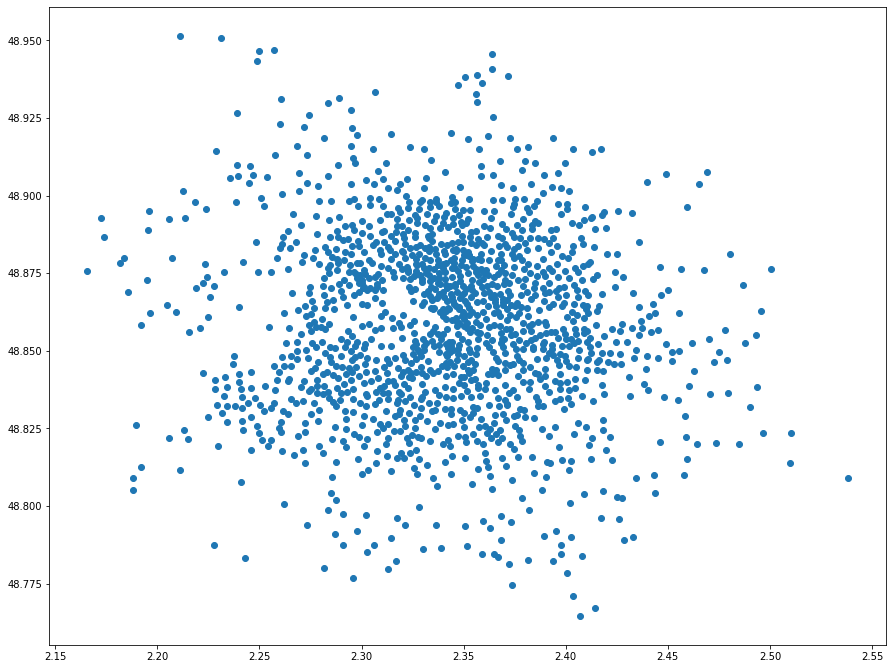

In [11]:
geo_data.plot(figsize=(15, 15));

Demandons à GeoPandas de changer la taille de nos marqueurs en fonction de la capacité de chaque station :

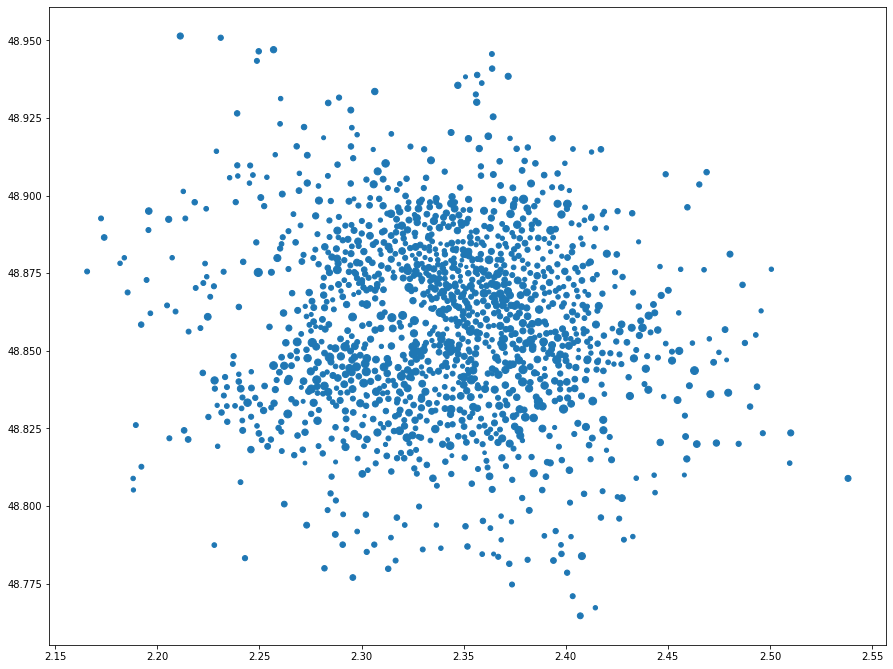

In [10]:
geo_data.plot(markersize=geo_data.capacity, figsize=(15, 15));

Ou encore, de changer la taille de nos marqueurs en fonction du nombre de vélibs dans la station :

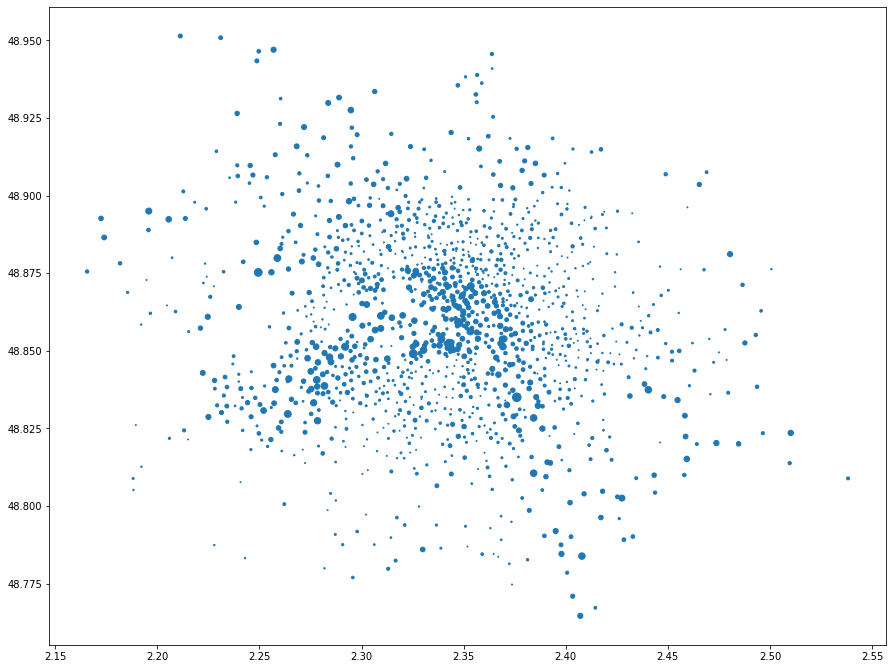

In [9]:
geo_data.plot(markersize=geo_data.num_bikes_available, figsize=(15, 15));

On se représente déjà mieux la distribution du nombre de vélibs dans Paris ! Mais au lieu de jouer uniquement avec la taille des marqueurs, on peut aussi varier leur couleur en spécifiant une carte de couleur `cmap` :

> les différentes cartes des couleurs peuvent être consulter ici [matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

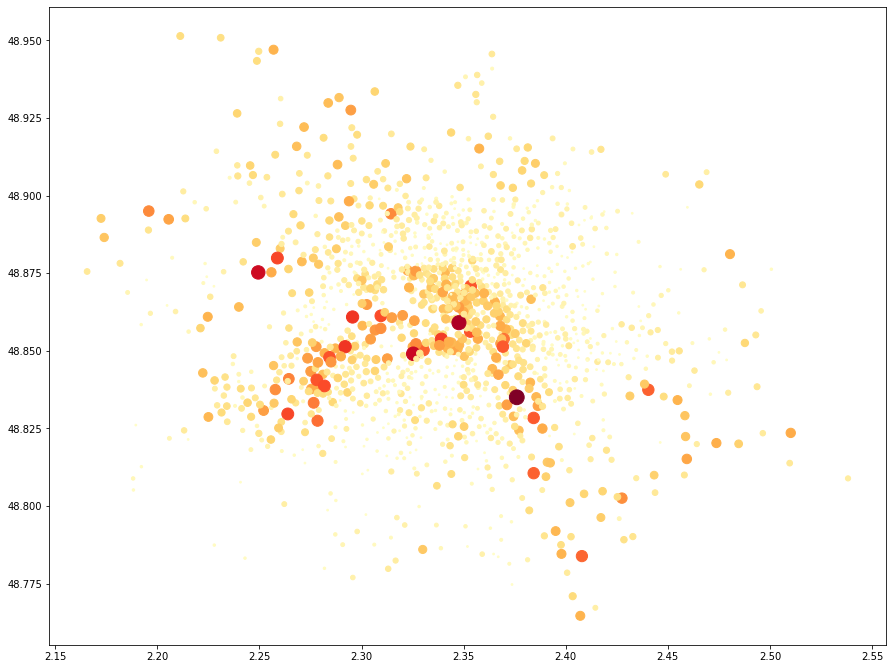

In [8]:
# figure et axes graphiques
flt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# affichage forçé
plt.show()

Maintenant nous allons pouvoir ajouter un fond de carte provenant, par exemple, de [OpenStreetMap](https://www.openstreetmap.fr/). Il existe un module python pour faire ça en une ligne et ce module s'appelle `contextily`. Le seul pré-requis est de convertir les coordonnées GPS au format EPSG:3857, mais GeoPandas fait ça très bien :

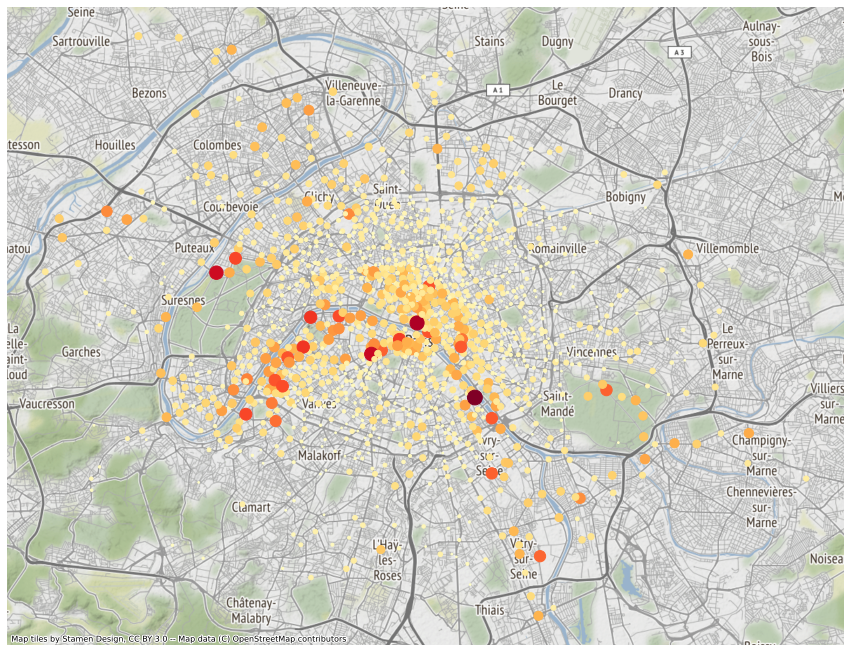

In [7]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes)

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# affichage forçé
plt.show()

## Exportation des représentations

Il s'agit ici d'exporter les représentations graphiques obtenues sous forme d'images sauvegardées dans un dossier sur le Drive.

Ce dossier est `/SAE15/web/data/` présent dans l'arborescence de votre projet.

Les images, sauvegardées dans cet emplacement, seront intégrées automatiquement dans la page Web `projetSAE15.html`, page de publication des résultats de l'analyse des données Vélib.

Le code suivant montre de quelle manière opérer une telle sauvegarde après avoir affiché une figure :


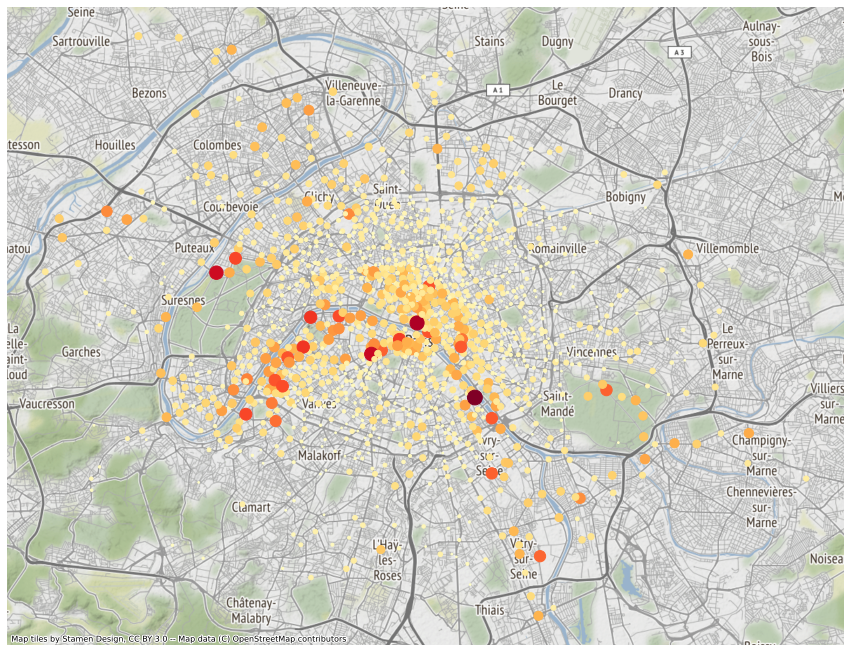

In [6]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# sauvegarde de la figure courante sur le Drive au format SVG (vectoriel)
plt.savefig('/content/drive/My Drive/Colab notebooks/SAE15/web/data/carte1.svg')

# affichage forçé
plt.show()

## Générez votre propre carte

On vous demande de générer votre propre carte des stations Vélib géolocalisées afin de représenter une information de votre choix (capacité des stations, stands disponibles, taux de disponibilité des vélos ou des stands,...).

> On pourra également ajouter un titre (méthode `title` pour les axes) avec la date de dernière mise à jour des données (fonction spécifique `sae15_spec.getLatestDate()`).

> Il est également possible de représenter deux types d'informations sur une même carte en jouant avec la taille des points d'une part et, d'autre part avec leur couleur.

⚠ Vérifier la bonne exportation de la carte vers le dossier destination `SAE15/web/data/`.

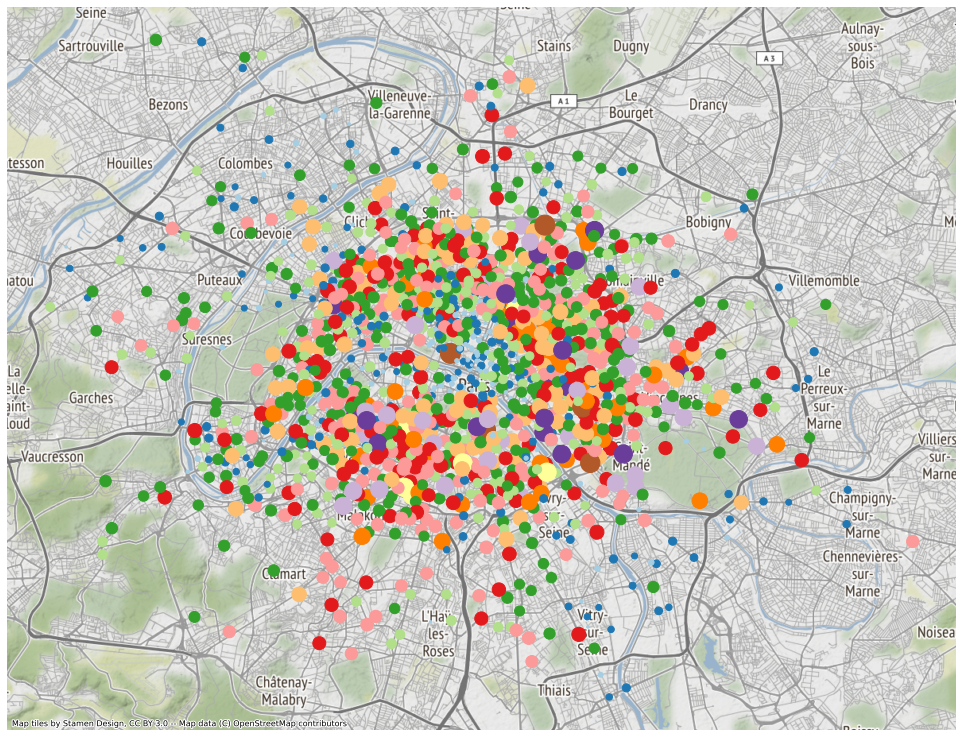

In [16]:
# votre code...
#
geo_data_with_map = geo_data.to_crs(epsg=3857)

f, axes = plt.subplots(1, figsize=(17,17))

geo_data_with_map.plot(geo_data.num_docks_available, markersize=6*geo_data.num_docks_available, cmap="Paired", ax=axes)

axes.set_axis_off()

ctx.add_basemap(axes)

plt.savefig('/content/drive/My Drive/Colab notebooks/SAE15/web/data/carte1.svg')

plt.show()


---
🎯  Livrer ce test unitaire sur Eprel en fin de séance

---



